In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
from sklearn import tree

# First step into machine learning beyond classic regression

In [4]:
# Warm Up
R1 = np.array([5,8,9])
R2 = np.array([1,0,20])

Calculate the a) Gini co-efficient and b) entropy for R1. Then, write a function that takes in a normalized vector and outputs the Gini co-efficent and Entropy.

In [5]:
R1_norm = R1 / R1.sum()
R2_norm = R2 / R2.sum()

G = lambda x: 1 - (x**2).sum()
H = lambda x: - (x*np.log(x, where = x!= 0)).sum()

H(R2_norm)

0.19144408195771734

Calculate the weighted sums.

In [6]:
["a"]*3

['a', 'a', 'a']

<Axes: xlabel='True Values', ylabel='Pred Values'>

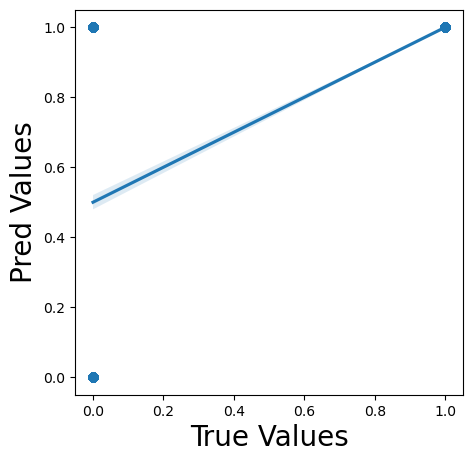

In [7]:
plt.figure(figsize=(5,5,))
xx = [0,1,0]*1000
yy = [0,1,1]*1000

plt.xlabel("True Values", fontsize=20)
plt.ylabel("Pred Values", fontsize=20)

sns.regplot(x = xx,y = yy)

# Decision Trees

Here, we will implement once again the titanic dataset.

In [16]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

There are missing values for age. Replace the nans with the median age.

In [17]:
# Fill missing age values with the median age
titanic['age'].fillna(titanic['age'].median(), inplace=True)

/var/folders/gn/hl68wgxj1dg3j7wh7shxt0jw0000gp/T/ipykernel_7458/1664766433.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


Drop the following columns: 'who', 'embarked', 'parch', 'fare', 'deck', 'embark_town', 'alive'

In [18]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [19]:
# Drop 'deck' and 'embark_town' columns as they have many missing values
titanic.drop(columns=['who', 'embarked', 'parch', 'fare', 'deck', 'embark_town', 'alive'], inplace=True)

Using label_encoder, transform the dataset into integer encodings.

In [20]:
# Convert categorical columns to numeric using Label Encoding
label_encoder = LabelEncoder()

titanic['sex'] = label_encoder.fit_transform(titanic['sex'])  # Male: 1, Female: 0
titanic['class'] = label_encoder.fit_transform(titanic['class'])  # 1st, 2nd, 3rd -> 0, 1, 2
titanic['alone'] = label_encoder.fit_transform(titanic['alone'])

# Set-up your training by specifying X and y

Use train_test_split to split the data and train.

In [22]:
# Define features (X) and target (y)
X = titanic.drop(columns=['survived'])
y = titanic['survived']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train.shape}, Test set shape: {X_test.shape}')

Training set shape: (712, 7), Test set shape: (179, 7)


In [23]:
# Create and train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42, criterion='gini',max_depth=2)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

In [25]:
feature_names = X.columns

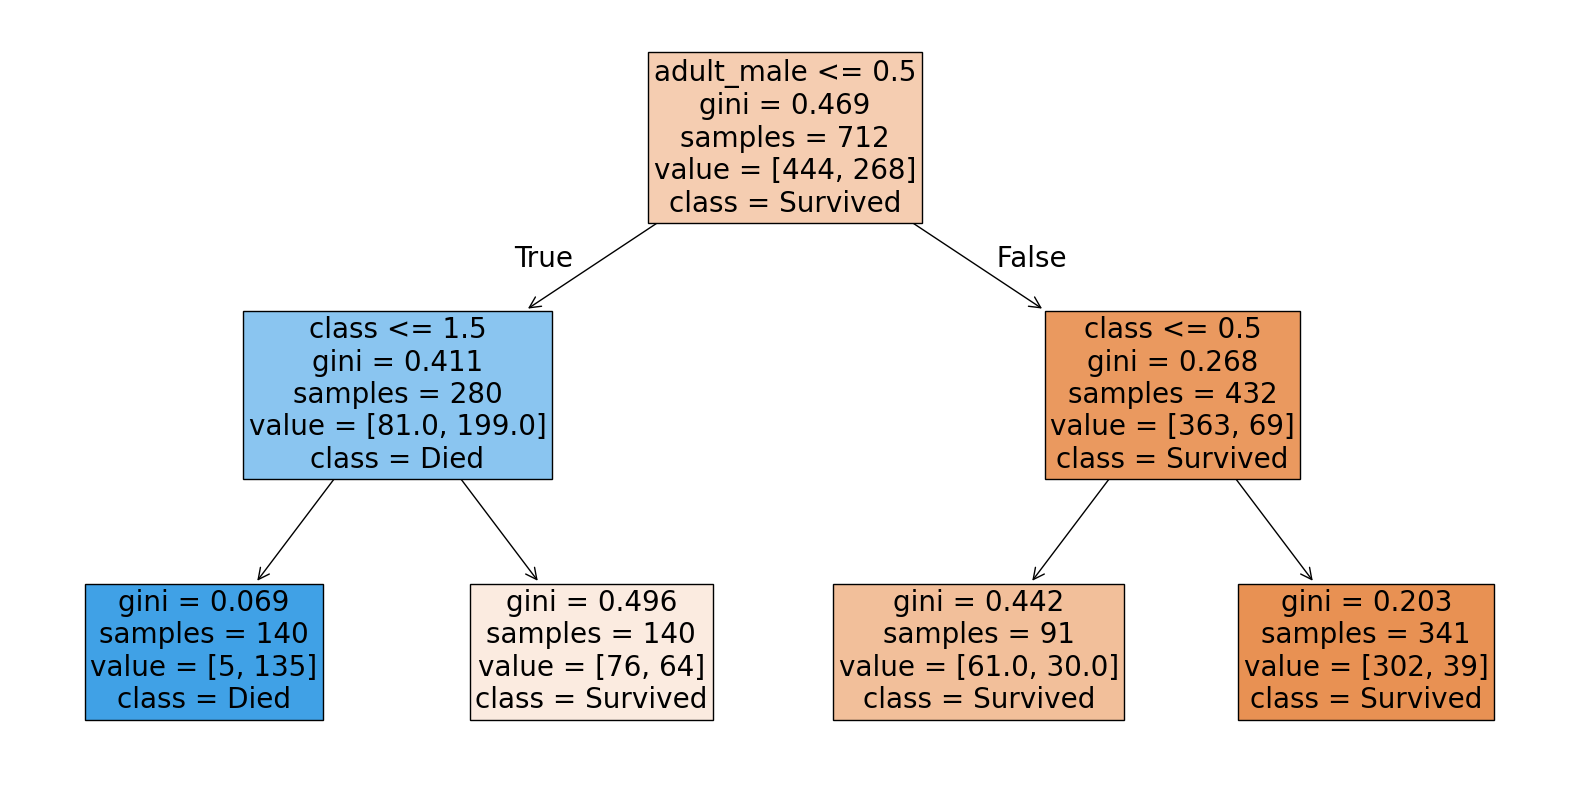

In [26]:
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree, 
                   feature_names=feature_names,  
                   class_names=["Survived", "Died"],
                   filled=True, max_depth=3,fontsize=20,
      )
print("")

### Evaluating your results
Now that you have your predicted values and actual values, plot a scatter plot and give the R2. What do you see?

<Axes: xlabel='survived'>

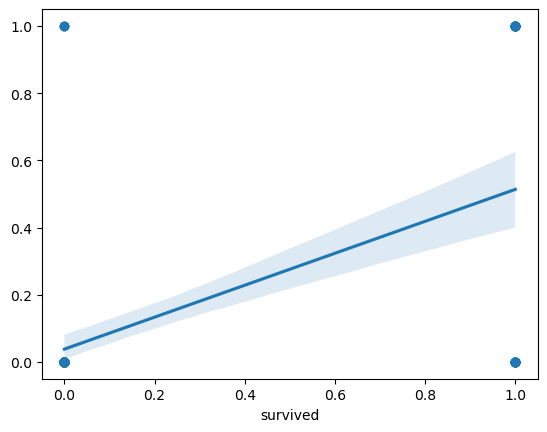

In [28]:
sns.regplot(x=y_test,y=y_pred_dt)

Calculate the accuracy, recall, and precision. Then, use the function confusion_matrix and sns.heatmap to plot a confusion matrix.

Decision Tree Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.96      0.83       105
           1       0.90      0.51      0.66        74

    accuracy                           0.78       179
   macro avg       0.82      0.74      0.74       179
weighted avg       0.81      0.78      0.76       179



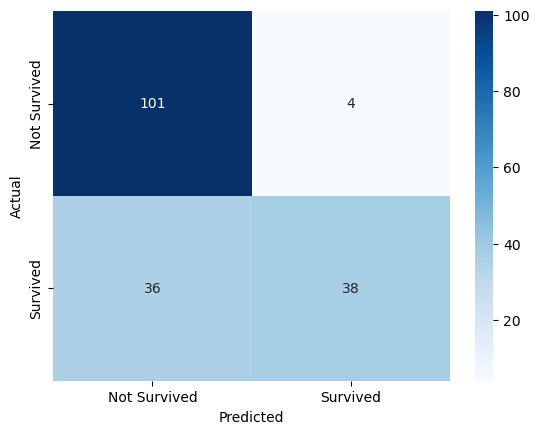

In [29]:
# Evaluate the performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Plot confusion matrix
confusion_dt = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(confusion_dt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Change the cost criterion from Gini to entropy
Does this change the performance metric?

In [30]:
# Create and train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42, 
                                       criterion='entropy')
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



### Hyperparameter tuning: How does performance change with increased max depth?
Write code that increases the max depth from 1 to 5, then plot on one figure how this impacts the accuracy, recall, and precision.

In [31]:
results = []
for i in range(1,10):
    # Create and train the Decision Tree Classifier
    decision_tree = DecisionTreeClassifier(max_depth=i,)
    decision_tree.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_dt = decision_tree.predict(X_test)

    # Evaluate the performance
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    
    results.append(accuracy_dt)
    

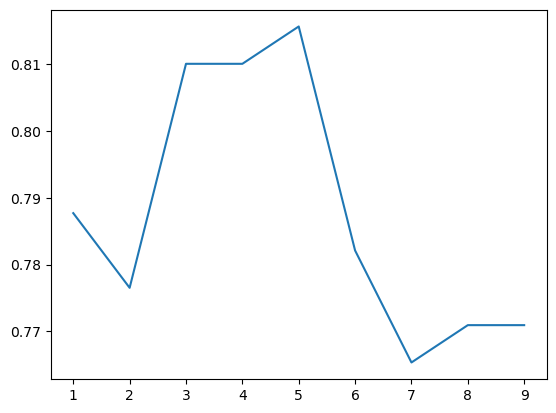

In [32]:
plt.plot(range(1,10),results)

# Random Forest

Use the function RandomForestClassifier to train a classifier. 

In [44]:
%%time
rf = RandomForestClassifier(
    n_estimators=100,      
    random_state=42
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


CPU times: user 166 ms, sys: 5.15 ms, total: 171 ms
Wall time: 188 ms


How does this compare to the decision tree?

In [45]:
acc = accuracy_score(y_test, y_pred)
print("RF Accuracy:", acc)

acc_dt = accuracy_score(y_test, y_pred_dt)
print("DT Accuracy:", acc_dt)

RF Accuracy: 0.8212290502793296
DT Accuracy: 0.770949720670391


## Grid search: Choose 10 values for n_estimators and 10 values for max_depth
#### Plot a heatmap that shows the grid search on these values

In [ ]:
def train

# Practice with a larger, multilabeled dataset

Seven types of tree cover:
* Spruce/Fir
* Lodgepole Pine
* Ponderosa Pine
* Cottonwood/Willow
* Aspen
* Douglas-fir
* Krummholz

In [ ]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"
columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
    'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
    'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
    'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
    'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
    'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40',
    'Cover_Type'
]

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)


Split the data like above, train a decision tree and RF model, then compare the two.